In [15]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import timeit
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc, roc_curve, accuracy_score, confusion_matrix
from scipy import interp
from imblearn.under_sampling import RandomUnderSampler
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
#set random seed
rs=3

In [17]:
data=pd.read_csv('part2_data.csv')

In [18]:
data.head()


,drv_age1,vh_age,vh_cyl,vh_din,pol_bonus,vh_sale_begin,vh_sale_end,vh_value,vh_speed,claim_amount,made_claim
0,54,11,1461,101,0.5,12,10,18950,179,0.00,0
1,69,7,1461,86,0.5,10,8,17450,174,0.00,0
2,62,18,2664,125,0.5,19,17,29713,155,0.00,0
3,44,11,3189,250,0.5,12,8,51383,214,1884.16,1
4,79,9,998,68,0.5,10,5,9450,157,0.00,0


Imbalanced dataset

In [19]:
data.made_claim.value_counts()

0    18139
1     1861
Name: made_claim, dtype: int64

In [20]:
data=data.drop(columns='claim_amount')
X, Y = data.loc[:, data.columns!= 'made_claim'].values, data.loc[:, data.columns == 'made_claim'].values.ravel()

Splitting the dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=23)

Downsample the majority class

In [22]:
rus = RandomUnderSampler(random_state=rs)
X_train, y_train=rus.fit_resample(X_train, y_train)
X_test, y_test=rus.fit_resample(X_test, y_test)


In [23]:
# import tensorflow as tf
# from keras import backend as K

# def auc(y_true, y_pred):
#     auc = tf.metrics.auc(y_true, y_pred)[1]
#     K.get_session().run(tf.local_variables_initializer())
#     return auc


In [24]:

def model_baseline():
    
    #initializing the ANN
    classifier = Sequential()

    #adding an input layer and the first hidden layer
    classifier.add(Dense(output_dim = 6,kernel_initializer='uniform',activation = 'relu',input_dim=9))

    #adding the second hidden layer
    classifier.add(Dense(output_dim =4,kernel_initializer='uniform',activation = 'relu'))

    #Adding the output layer
    classifier.add(Dense(output_dim = 1 ,kernel_initializer='uniform',activation = 'sigmoid'))


    #Compile the model
    classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    #Fitting the ANN to the traning set
    #classifier.fit(X_train, y_train,validation_data =(X_test,y_test),epochs=10,batch_size=64)

    
    return classifier



# cv_mean_roc(X, Y, model, 'NN',False, n_splits=5)

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = model_baseline()
keras_model.fit(X_train, y_train,validation_data =(X_test,y_test),epochs=10,batch_size=64)




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=9, units=6)`
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=4)`
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=1)`
  


Train on 2814 samples, validate on 908 samples
Epoch 1/10
2814/2814 [==============================] - 0s 85us/step - loss: 0.7415 - accuracy: 0.4996 - val_loss: 0.6920 - val_accuracy: 0.5022
Epoch 2/10
2814/2814 [==============================] - 0s 29us/step - loss: 0.6927 - accuracy: 0.5210 - val_loss: 0.6888 - val_accuracy: 0.5275
Epoch 3/10
2814/2814 [==============================] - 0s 27us/step - loss: 0.6928 - accuracy: 0.5064 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/10
2814/2814 [==============================] - 0s 27us/step - loss: 0.6922 - accuracy: 0.5043 - val_loss: 0.6910 - val_accuracy: 0.5022
Epoch 5/10
2814/2814 [==============================] - 0s 25us/step - loss: 0.6917 - accuracy: 0.5039 - val_loss: 0.6907 - val_accuracy: 0.5033
Epoch 6/10
2814/2814 [==============================] - 0s 25us/step - loss: 0.6905 - accuracy: 0.5092 - val_loss: 0.6905 - val_accuracy: 0.5033
Epoch 7/10
2814/2814 [==============================] - 0s 26us/step - loss: 0.6911

In [29]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [30]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

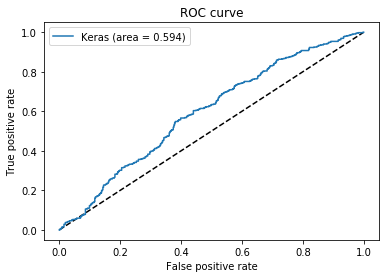

In [31]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()